## Q1: First, obtain the housing price pattern during this sample period. You can compare the price pattern between with and without controlling any housing characteristics and township fixed effects.

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
df = pd.read_csv('HousingTransaction.csv')
df = df.dropna()
df['trans_date_mdy'] = pd.to_datetime(df['trans_date_mdy']).dt.strftime('%Y/%m')
df['unit_price'] = np.log(df['unit_price'])

###  1-of-K Encode Categorical Variables in x_train
categorical_cols = ['county', 'guard', 'town', 'trans_obj', 'build_form', 'trans_date_mdy']
df_new = pd.get_dummies(df, columns = categorical_cols, drop_first=True)

#### uses `C()` to indicate a categorical variable: county, guard, town, trans_obj, build_form, trans_date

from sklearn import datasets, linear_model

- Create linear regression object
regr = linear_model.LinearRegression()

from sklearn import linear_model
from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
        regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
        regr.fit(X_train, Y_train)
    predicted = regr.predict(X_test)

cluster_firm_ols = sm.ols(formula='y ~ x', data=df).fit(cov_type='cluster',
                                                        cov_kwds= {'groups': df['firmid']},
                                                        use_t=True)

In [181]:
# with control
from statsmodels.formula.api import ols
with_control = ols('unit_price ~ C(trans_date_mdy)  + C(town) + C(build_form) + land_size'
                   , data=df).fit(cov_type='cluster',cov_kwds={'groups':df['town'].values}) 

with_control.summary()

C:\Users\PEIYU\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 101, but rank is 37
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             unit_price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                 1.149e+13
Date:                Sat, 30 Oct 2021   Prob (F-statistic):          2.18e-232
Time:                        17:38:00   Log-Likelihood:                -81147.
No. Observations:              264081   AIC:                         1.625e+05
Df Residuals:                  263979   BIC:                         1.636e+05
Df Model:                         101                                         
Covariance Type:              cluster                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         10.9972      0.021    533.040      0.000      10.957      11.038
C(trans_date_mdy)[T.2012/09]      -0.0105      0.015     -0.708      0.479      -0.040       0.019
C(trans_date_mdy)[T.2012/10]       0.0195      0.010      1.952      0.051   -7.81e-05       0.039
C(trans_date_mdy)[T.2012/11]       0.0173      0.017      0.988      0.323      -0.017       0.052
C(trans_date_mdy)[T.2012/12]       0.0176      0.025      0.716      0.474      -0.031       0.066
C(trans_date_mdy)[T.2013/01]       0.0304      0.015      2.076      0.038       0.002       0.059
C(trans_date_mdy)[T.2013/02]       0.0421      0.017      2.494      0.013       0.009       0.075
C(trans_date_mdy)[T.2013/03]       0.0404      0.017      2.446      0.014       0.008       0.073
C(trans_date_mdy)[T.2013/04]       0.0706      0.016      4.381      0.000       0.039       0.102
C(trans_date_mdy)[T.2013/05]       0.0884      0.017      5.114      0.000       0.055       0.122
C(trans_date_mdy)[T.2013/06]       0.0902      0.016      5.636      0.000       0.059       0.122
C(trans_date_mdy)[T.2013/07]       0.0961      0.018      5.423      0.000       0.061       0.131
C(trans_date_mdy)[T.2013/08]       0.0914      0.023      4.059      0.000       0.047       0.136
C(trans_date_mdy)[T.2013/09]       0.0849      0.043      1.976      0.048       0.001       0.169
C(trans_date_mdy)[T.2013/10]       0.1156      0.013      8.884      0.000       0.090       0.141
C(trans_date_mdy)[T.2013/11]       0.1317      0.019      6.811      0.000       0.094       0.170
C(trans_date_mdy)[T.2013/12]       0.0942      0.016      5.798      0.000       0.062       0.126
C(trans_date_mdy)[T.2014/01]       0.1414      0.016      8.785      0.000       0.110       0.173
C(trans_date_mdy)[T.2014/02]       0.1572      0.014     10.951      0.000       0.129       0.185
C(trans_date_mdy)[T.2014/03]       0.1653      0.015     11.267      0.000       0.137       0.194
C(trans_date_mdy)[T.2014/04]       0.1177      0.038      3.134      0.002       0.044       0.191
C(trans_date_mdy)[T.2014/05]       0.1712      0.017     10.250      0.000       0.138       0.204
C(trans_date_mdy)[T.2014/06]       0.1539      0.019      7.982      0.000       0.116       0.192
C(trans_date_mdy)[T.2014/07]       0.1478      0.017      8.519      0.000       0.114       0.182
C(trans_date_mdy)[T.2014/08]       0.1305      0.019      7.005      0.000       0.094       0.167
C(trans_date_mdy)[T.2014/09]       0.1345      0.016      8.595      0.000       0.104       0.165
C(trans_date_mdy)[T.2014/10]       0.1397      0.017      8.345      0.000       0.107       0.173
C(trans_date_mdy)[T.2014/11]       0.1645      0.019      8.643      0.000       0.127       0.202
C(trans_date_m

In [180]:
# no control
from statsmodels.formula.api import ols
no_control = ols('unit_price ~ C(trans_date_mdy)', data=df).fit(cov_type='cluster',cov_kwds={'groups':df['town'].values}) 
#no_control.summary()
no_control.summary()

C:\Users\PEIYU\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 60, but rank is 40
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             unit_price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                -4.452e+11
Date:                Sat, 30 Oct 2021   Prob (F-statistic):               1.00
Time:                        17:37:41   Log-Likelihood:            -2.0100e+05
No. Observations:              264081   AIC:                         4.021e+05
Df Residuals:                  264020   BIC:                         4.028e+05
Df Model:                          60                                         
Covariance Type:              cluster                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       11.4020      0.084    136.413      0.000      11.238      11.566
C(trans_date_mdy)[T.2012/09]    -0.0409      0.045     -0.912      0.362      -0.129       0.047
C(trans_date_mdy)[T.2012/10]     0.0195      0.025      0.770      0.441      -0.030       0.069
C(trans_date_mdy)[T.2012/11]     0.0524      0.021      2.456      0.014       0.011       0.094
C(trans_date_mdy)[T.2012/12]     0.0456      0.022      2.070      0.038       0.002       0.089
C(trans_date_mdy)[T.2013/01]     0.0563      0.026      2.175      0.030       0.006       0.107
C(trans_date_mdy)[T.2013/02]     0.0875      0.024      3.701      0.000       0.041       0.134
C(trans_date_mdy)[T.2013/03]     0.0844      0.029      2.881      0.004       0.027       0.142
C(trans_date_mdy)[T.2013/04]     0.1202      0.031      3.889      0.000       0.060       0.181
C(trans_date_mdy)[T.2013/05]     0.1438      0.026      5.509      0.000       0.093       0.195
C(trans_date_mdy)[T.2013/06]     0.1290      0.027      4.739      0.000       0.076       0.182
C(trans_date_mdy)[T.2013/07]     0.1508      0.034      4.475      0.000       0.085       0.217
C(trans_date_mdy)[T.2013/08]     0.1263      0.029      4.417      0.000       0.070       0.182
C(trans_date_mdy)[T.2013/09]     0.1338      0.038      3.526      0.000       0.059       0.208
C(trans_date_mdy)[T.2013/10]     0.1463      0.029      5.092      0.000       0.090       0.203
C(trans_date_mdy)[T.2013/11]     0.1595      0.034      4.683      0.000       0.093       0.226
C(trans_date_mdy)[T.2013/12]     0.1616      0.026      6.316      0.000       0.111       0.212
C(trans_date_mdy)[T.2014/01]     0.2417      0.048      5.064      0.000       0.148       0.335
C(trans_date_mdy)[T.2014/02]     0.2526      0.033      7.771      0.000       0.189       0.316
C(trans_date_mdy)[T.2014/03]     0.2153      0.026      8.247      0.000       0.164       0.266
C(trans_date_mdy)[T.2014/04]     0.1877      0.038      4.916      0.000       0.113       0.263
C(trans_date_mdy)[T.2014/05]     0.2190      0.032      6.919      0.000       0.157       0.281
C(trans_date_mdy)[T.2014/06]     0.1914      0.034      5.670      0.000       0.125       0.258
C(trans_date_mdy)[T.2014/07]     0.1838      0.038      4.846      0.000       0.109       0.258
C(trans_date_mdy)[T.2014/08]     0.1381      0.048      2.896      0.004       0.045       0.232
C(trans_date_mdy)[T.2014/09]     0.1733      0.027      6.312      0.000       0.119       0.227
C(trans_date_mdy)[T.2014/10]     0.2044      0.036      5.720      0.000       0.134       0.274
C(trans_date_mdy)[T.2014/11]     0.1946      0.025      7.873      0.000       0.146       0.243
C(trans_date_mdy)[T.2014/12]     0.1575      0.028      5.645      0.000    

In [106]:
time_ = set(df['trans_date_mdy'].tolist())
print(type(time_))
list_time_ = list(time_)
print(type(list_time_))

from datetime import datetime
list_time_.sort(key = lambda date: datetime.strptime(date, '%Y/%m'))
list_time_.pop(0)
print(list_time_)
#.sort(key=lambda date: datetime.strptime(date, "%d-%b-%y"))

<class 'set'>
<class 'list'>
['2012/09', '2012/10', '2012/11', '2012/12', '2013/01', '2013/02', '2013/03', '2013/04', '2013/05', '2013/06', '2013/07', '2013/08', '2013/09', '2013/10', '2013/11', '2013/12', '2014/01', '2014/02', '2014/03', '2014/04', '2014/05', '2014/06', '2014/07', '2014/08', '2014/09', '2014/10', '2014/11', '2014/12', '2015/01', '2015/02', '2015/03', '2015/04', '2015/05', '2015/06', '2015/07', '2015/08', '2015/09', '2015/10', '2015/11', '2015/12', '2016/01', '2016/02', '2016/03', '2016/04', '2016/05', '2016/06', '2016/07', '2016/08', '2016/09', '2016/10', '2016/11', '2016/12', '2017/01', '2017/02', '2017/03', '2017/04', '2017/05', '2017/06', '2017/07', '2017/08']


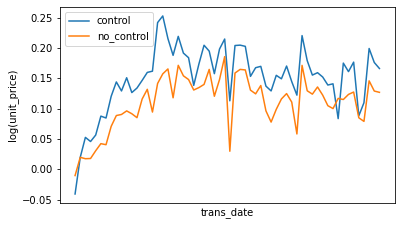

In [145]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import numpy as np
import datetime as dt


x = [dt.datetime.utcnow() + dt.timedelta(days=i) for i in range(60)]

y1 = no_control.params[1:]
y2 = with_control.params[1:61]
plt.plot(x, y1,
        x, y2)

locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()
plt.xlabel('trans_date')
plt.ylabel('log(unit_price)')
plt.legend(['control', 'no_control'])
plt.savefig('io_hw1_q1_final.png')
#plt.show()

## Q2: The housing price pattern between new and old apartments

### If someone wants to know the housing price pattern between new and old apartments, can you draw that? (Note: you can use housing age to define any group for new and old one.)

In [111]:
from sklearn import linear_model
from statsmodels.formula.api import ols

In [112]:
import statsmodels.api as sm

In [121]:
df = pd.read_csv('HousingTransaction.csv')
df['trans_date_mdy'] = pd.to_datetime(df['trans_date_mdy']).dt.strftime('%Y/%m')

###  1-of-K Encode Categorical Variables in x_train
categorical_cols = ['county', 'guard', 'town', 'trans_obj', 'build_form', 'trans_date_mdy']
df_new = pd.get_dummies(df, columns = categorical_cols, drop_first=True)

df = df.dropna()
df['unit_price'] = np.log(df['unit_price'])

from statsmodels.formula.api import ols

conditions = [
    (df['housing_age_y'] <= 10),
    (df['housing_age_y'] > 10) & (df['housing_age_y'] <= 20),
    (df['housing_age_y'] > 20) & (df['housing_age_y'] <= 30),
    (df['housing_age_y'] > 30) & (df['housing_age_y'] <= 40),
    (df['housing_age_y'] > 40)
    ]
values = ['Housing Age <= 10', 'Housing Age (10,20]', 'Housing Age (20,30]', 'Housing Age (30,40]', 'Housing Age > 40']
df['Housing_Age_Tier'] = np.select(conditions, values)
df['sqr_age'] = (df['housing_age_y'])**2
df.columns

Index(['id', 'county', 'town', 'trans_obj', 'land_size', 'build_form',
       'build_size', 'num_bedroom', 'num_livingroom', 'num_bathroom', 'guard',
       'total_price', 'unit_price', 'trans_date_mdy', 'finished_date_mdy',
       'housing_age_y', 'build_floor', 'trans_floor', 'cor_x', 'cor_y',
       'Housing_Age_Tier', 'sqr_age'],
      dtype='object')

In [127]:
df_age_0 = df.loc[df['Housing_Age_Tier'] == 'Housing Age <= 10']
df_age_1 = df.loc[df['Housing_Age_Tier'] == 'Housing Age (10,20]']
df_age_2 = df.loc[df['Housing_Age_Tier'] == 'Housing Age (20,30]']
df_age_3 = df.loc[df['Housing_Age_Tier'] == 'Housing Age (30,40]']
df_age_4 = df.loc[df['Housing_Age_Tier'] == 'Housing Age > 40']

In [161]:
house_age_tier0 = ols('unit_price ~ housing_age_y + sqr_age + C(trans_date_mdy) + C(town)' 
                      , data = df_age_0).fit(cov_type='cluster',cov_kwds={'groups':df_age_0['town'].values}) 
house_age_tier1 = ols('unit_price ~ housing_age_y + sqr_age + C(trans_date_mdy) + C(town)' 
                      , data = df_age_1).fit(cov_type='cluster',cov_kwds={'groups':df_age_1['town'].values}) 
house_age_tier2 = ols('unit_price ~ housing_age_y + sqr_age + C(trans_date_mdy) + C(town)' 
                      , data = df_age_2).fit(cov_type='cluster',cov_kwds={'groups':df_age_2['town'].values}) 
house_age_tier3 = ols('unit_price ~ housing_age_y + sqr_age + C(trans_date_mdy) + C(town)' 
                      , data = df_age_3).fit(cov_type='cluster',cov_kwds={'groups':df_age_3['town'].values}) 
house_age_tier4 = ols('unit_price ~ housing_age_y + sqr_age + C(trans_date_mdy) + C(town)' 
                      , data = df_age_4).fit(cov_type='cluster',cov_kwds={'groups':df_age_4['town'].values}) 

In [150]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import numpy as np
import datetime as dt

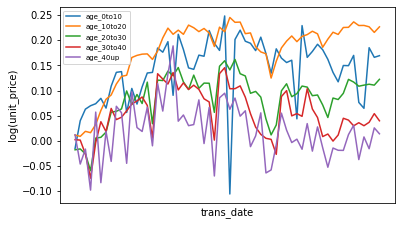

In [157]:
x = [dt.datetime.utcnow() + dt.timedelta(days=i) for i in range(60)]

y0 = house_age_tier0.params[1:61]
y1 = house_age_tier1.params[1:61]
y2 = house_age_tier2.params[1:61]
y3 = house_age_tier3.params[1:61]
y4 = house_age_tier4.params[1:61]

plt.plot(x, y0,
         x, y1,
         x, y2,
         x, y3,
         x, y4)

locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()
plt.xlabel('trans_date')
plt.ylabel('log(unit_price)')
plt.legend(['age_0to10', 'age_10to20', 'age_20to30', 'age_30to40', 'age_40up'], loc = 2, prop={'size': 7})
plt.savefig('io_hw1_q2_age_date_town_obj_floor.png')
#plt.show()

In [164]:
house_age_tiers = ols('unit_price ~ housing_age_y + sqr_age + C(Housing_Age_Tier) + C(trans_date_mdy) + C(town)' 
                      , data = df).fit(cov_type='cluster',cov_kwds={'groups':df['town'].values}) 

In [165]:
house_age_tiers.summary()

C:\Users\PEIYU\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 103, but rank is 37
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             unit_price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                -7.819e+12
Date:                Sat, 30 Oct 2021   Prob (F-statistic):               1.00
Time:                        16:29:21   Log-Likelihood:                -72856.
No. Observations:              264081   AIC:                         1.459e+05
Df Residuals:                  263977   BIC:                         1.470e+05
Df Model:                         103                                         
Covariance Type:              cluster                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     10.9979      0.071    154.269      0.000      10.858      11.138
C(Housing_Age_Tier)[T.Housing Age (20,30]]    -0.0556      0.022     -2.565      0.010      -0.098      -0.013
C(Housing_Age_Tier)[T.Housing Age (30,40]]    -0.0662      0.021     -3.131      0.002      -0.108      -0.025
C(Housing_Age_Tier)[T.Housing Age <= 10]       0.0594      0.049      1.218      0.223      -0.036       0.155
C(Housing_Age_Tier)[T.Housing Age > 40]       -0.0254      0.020     -1.263      0.207      -0.065       0.014
C(trans_date_mdy)[T.2012/09]                  -0.0102      0.018     -0.568      0.570      -0.045       0.025
C(trans_date_mdy)[T.2012/10]                   0.0124      0.009      1.385      0.166      -0.005       0.030
C(trans_date_mdy)[T.2012/11]                   0.0165      0.017      0.952      0.341      -0.017       0.051
C(trans_date_mdy)[T.2012/12]                   0.0114      0.022      0.527      0.598      -0.031       0.054
C(trans_date_mdy)[T.2013/01]                   0.0396      0.014      2.906      0.004       0.013       0.066
C(trans_date_mdy)[T.2013/02]                   0.0507      0.014      3.526      0.000       0.023       0.079
C(trans_date_mdy)[T.2013/03]                   0.0484      0.016      3.082      0.002       0.018       0.079
C(trans_date_mdy)[T.2013/04]                   0.0799      0.014      5.637      0.000       0.052       0.108
C(trans_date_mdy)[T.2013/05]                   0.0974      0.016      6.096      0.000       0.066       0.129
C(trans_date_mdy)[T.2013/06]                   0.1030      0.014      7.104      0.000       0.075       0.131
C(trans_date_mdy)[T.2013/07]                   0.0917      0.029      3.140      0.002       0.034       0.149
C(trans_date_mdy)[T.2013/08]                   0.0992      0.027      3.666      0.000       0.046       0.152
C(trans_date_mdy)[T.2013/09]                   0.0887      0.047      1.904      0.057      -0.003       0.180
C(trans_date_mdy)[T.2013/10]                   0.1129      0.013      8.833      0.000       0.088       0.138
C(trans_date_mdy)[T.2013/11]                   0.1263      0.015      8.663      0.000       0.098       0.155
C(trans_date_mdy)[T.2013/12]                   0.0971      0.016      6.209      0.000       0.066       0.128
C(trans_date_mdy)[T.2014/01]                   0.1602      0.015     10.444      0.000       0.130       0.190
C(trans_date_mdy)[T.2014/02]                   0.1668      0.014     11.795      0.000       0.139       0.194
C(trans_date_mdy)[T.2014/03]                   0.1747      0.013     13.599      0.000       0.150       0.200
C(trans_date_mdy)[T.2014/04]                   0.1254      0.042      2.961      0.003

|variable|coef|	std err|	z	|P-value|	0.025	|0.975|
|-|-|-|-|-|-|-|
|Intercept|	10.9979|	0.071	|154.269	|0.000|	10.858	|11.138|
|housing_age_y|	-0.0135|	0.007	|-2.072|	0.038|	-0.026	|-0.001|
|sqr_age	|0.0002	|0.000|	1.602	|0.109|	-4.09e-05	|0.000|
|Housing Age (20,30]|	-0.0556|	0.022	|-2.565|	0.010	|-0.098|	-0.013|
|Housing Age (30,40]|	-0.0662	|0.021	|-3.131|	0.002	|-0.108	|-0.025|
|Housing Age <= 10|	0.0594|	0.049	|1.218|	0.223	|-0.036	|0.155|
|Housing Age > 40|	-0.0254	|0.020	|-1.263|	0.207|	-0.065	|0.014|


## 3. Can you use the techniques we learned in the class to discover the effect of floor on housing prices? (Note: both trans_floor and build_floor could be important to housing prices.)

In [167]:
df = pd.read_csv('HousingTransaction.csv')
df['trans_date_mdy'] = pd.to_datetime(df['trans_date_mdy']).dt.strftime('%Y/%m')

df = df.dropna()
df['unit_price'] = np.log(df['unit_price'])

|variable|coef|	std err|	z	|P-value|0.025|	0.975|
|-|-|-|-|-|-|-|
|Intercept|	10.7823	|0.041|	262.739|	0.000	|10.70	|10.86|
|公寓(5樓含以下無電梯)|	-0.1104|	0.035|	-3.179|	0.001|	-0.178	|-0.042|
|套房(1房1廳1衛)|	0.0560	|0.022|	2.580|	0.010	|0.013|	0.098|
|華廈(10層含以下有電梯)|	-0.0086|	0.024	|-0.361	|0.718|	-0.055|	0.038|
|build_floor|	0.0126	|0.002|	5.098|	0.000	|0.008|	0.017|
|trans_floor|	0.0009	|0.000|	2.688|	0.007	|0.000|	0.002|

In [179]:
floor_model2 = ols('unit_price ~ build_floor + trans_floor + C(town)+ C(trans_date_mdy) + C(build_form)' 
                      , data=df).fit(cov_type='cluster',cov_kwds={'groups':df['town'].values}) 
floor_model2.summary()

C:\Users\PEIYU\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 102, but rank is 37
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             unit_price   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                 6.396e+12
Date:                Sat, 30 Oct 2021   Prob (F-statistic):          1.10e-227
Time:                        17:30:41   Log-Likelihood:                -77463.
No. Observations:              264081   AIC:                         1.551e+05
Df Residuals:                  263978   BIC:                         1.562e+05
Df Model:                         102                                         
Covariance Type:              cluster                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         10.7823      0.041    262.739      0.000      10.702      10.863
C(town)[T.三芝區]                    -0.8646      0.007   -127.270      0.000      -0.878      -0.851
C(town)[T.三重區]                     0.5583      0.006     95.408      0.000       0.547       0.570
C(town)[T.中和區]                     0.5796      0.006     94.561      0.000       0.568       0.592
C(town)[T.中山區]                     1.0990      0.007    156.510      0.000       1.085       1.113
C(town)[T.中正區]                     1.2349      0.006    208.729      0.000       1.223       1.246
C(town)[T.五股區]                     0.1675      0.003     53.588      0.000       0.161       0.174
C(town)[T.信義區]                     1.2337      0.006    205.038      0.000       1.222       1.246
C(town)[T.內湖區]                     0.9597      0.006    161.253      0.000       0.948       0.971
C(town)[T.八里區]                    -0.0897      0.006    -16.058      0.000      -0.101      -0.079
C(town)[T.北投區]                     0.7736      0.007    116.073      0.000       0.761       0.787
C(town)[T.南港區]                     0.9919      0.004    265.896      0.000       0.985       0.999
C(town)[T.土城區]                     0.3880      0.005     78.200      0.000       0.378       0.398
C(town)[T.士林區]                     0.9909      0.008    123.225      0.000       0.975       1.007
C(town)[T.大同區]                     0.8992      0.007    137.358      0.000       0.886       0.912
C(town)[T.大安區]                     1.3868      0.006    249.480      0.000       1.376       1.398
C(town)[T.文山區]                     0.7821      0.005    162.385      0.000       0.773       0.792
C(town)[T.新店區]                     0.4883      0.006     78.401      0.000       0.476       0.500
C(town)[T.新莊區]                     0.4767      0.004    130.160      0.000       0.469       0.484
C(town)[T.松山區]                     1.1914      0.006    204.557      0.000       1.180       1.203
C(town)[T.板橋區]                     0.5933      0.008     78.753      0.000       0.579       0.608
C(town)[T.林口區]                     0.1757      0.003     69.415      0.000       0.171       0.181
C(town)[T.樹林區]                     0.1115      0.004     28.182      0.000       0.104       0.119
C(town)[T.永和區]                     0.7625      0.007    116.236      0.000       0.750       0.775
C(town)[T.汐止區]                     0.2566      0.004     61.881      0.000       0.248       0.265
C(town)[T.泰山區]                     0.2841      0.004     66.020      0.000       0.276       0.293
C(town)[T.淡水區]                    -0.0152      0.003     -6.064      0.000      -0.020      -0.010
C(town)[T.深坑區]                     0.2014      0.006     33.690      0.000       0.190       0.213
C(town)[T.瑞芳區]

## 4. From the previous question, do you find any difference among different types of buildings (build_form)?

In [178]:
cov_check = ols('build_floor ~ C(build_form) + trans_floor'
                , data=df).fit(cov_type='cluster',cov_kwds={'groups':df['town'].values}) 
cov_check.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            build_floor   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     1585.
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           8.24e-41
Time:                        16:51:34   Log-Likelihood:            -7.2299e+05
No. Observations:              264081   AIC:                         1.446e+06
Df Residuals:                  264076   BIC:                         1.446e+06
Df Model:                           4                                         
Covariance Type:              cluster                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         11.8180      0.318     37.181      0.000      11.195      12.441
C(build_form)[T.公寓(5樓含以下無電梯)]     -8.7968      0.235    -37.439      0.000      -9.257      -8.336
C(build_form)[T.套房(1房1廳1衛)]       -2.1413      0.557     -3.846      0.000      -3.233      -1.050
C(build_form)[T.華廈(10層含以下有電梯)]    -6.4124      0.215    -29.892      0.000      -6.833      -5.992
trans_floor                        0.5105      0.042     12.182      0.000       0.428       0.593
==============================================================================
Omnibus:                   113844.220   Durbin-Watson:                   0.615
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           771003.789
Skew:                           1.952   Prob(JB):                         0.00
Kurtosis:                      10.405   Cond. No.                         37.1
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
"""